In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [196]:
df = pd.read_csv('005930.KS.csv')

In [197]:
df.shape

(5779, 7)

In [198]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4591.915039,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4193.598633,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4223.659668,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4163.536133,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4336.391602,46880000


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5779 entries, 0 to 5778
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5779 non-null   object 
 1   Open       5779 non-null   float64
 2   High       5779 non-null   float64
 3   Low        5779 non-null   float64
 4   Close      5779 non-null   float64
 5   Adj Close  5779 non-null   float64
 6   Volume     5779 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 316.2+ KB


In [200]:
df['Date'] = pd.to_datetime(df['Date'])

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5779 entries, 0 to 5778
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5779 non-null   datetime64[ns]
 1   Open       5779 non-null   float64       
 2   High       5779 non-null   float64       
 3   Low        5779 non-null   float64       
 4   Close      5779 non-null   float64       
 5   Adj Close  5779 non-null   float64       
 6   Volume     5779 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 316.2 KB


In [202]:
df = df.set_index('Date')

In [203]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4591.915039,74195000
2000-01-05,5800.0,6060.0,5520.0,5580.0,4193.598633,74680000
2000-01-06,5750.0,5780.0,5580.0,5620.0,4223.659668,54390000
2000-01-07,5560.0,5670.0,5360.0,5540.0,4163.536133,40305000
2000-01-10,5600.0,5770.0,5580.0,5770.0,4336.391602,46880000


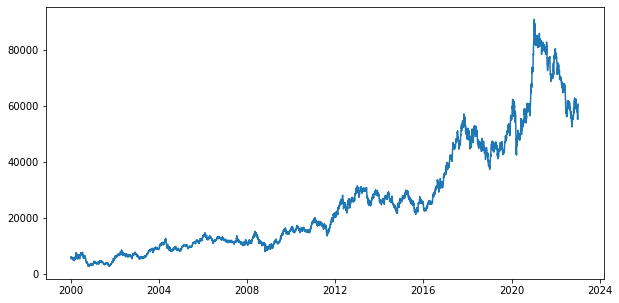

In [204]:
plt.figure(figsize = (10, 5))
plt.plot(df.index, df['Close'])
plt.show()

In [205]:
# 피처 추가

df['MA3'] = np.around(df['Close'].rolling(window = 3).mean(), 0)
# rolling을 쓰면 123, 234, 345으로 나아감, around 파라미터로 ,0을 주어서 소수점 제거.
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA3
Date,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4591.915039,74195000,NaN
2000-01-05,5800.0,6060.0,5520.0,5580.0,4193.598633,74680000,NaN
2000-01-06,5750.0,5780.0,5580.0,5620.0,4223.659668,54390000,5770.0
2000-01-07,5560.0,5670.0,5360.0,5540.0,4163.536133,40305000,5580.0
2000-01-10,5600.0,5770.0,5580.0,5770.0,4336.391602,46880000,5643.0


In [206]:
df['MA5'] = np.around(df['Close'].rolling(window = 5).mean(), 0)
df['Mid'] = (df['High']+df['Low'])/2
# rolling을 쓰면 123, 234, 345으로 나아감, around 파라미터로 ,0을 주어서 소수점 제거.
df.head()

,Open,High,Low,Close,Adj Close,Volume,MA3,MA5,Mid
Date,,,,,,,,,
2000-01-04,6000.0,6110.0,5660.0,6110.0,4591.915039,74195000,NaN,NaN,5885.0
2000-01-05,5800.0,6060.0,5520.0,5580.0,4193.598633,74680000,NaN,NaN,5790.0
2000-01-06,5750.0,5780.0,5580.0,5620.0,4223.659668,54390000,5770.0,NaN,5680.0
2000-01-07,5560.0,5670.0,5360.0,5540.0,4163.536133,40305000,5580.0,NaN,5515.0
2000-01-10,5600.0,5770.0,5580.0,5770.0,4336.391602,46880000,5643.0,5724.0,5675.0


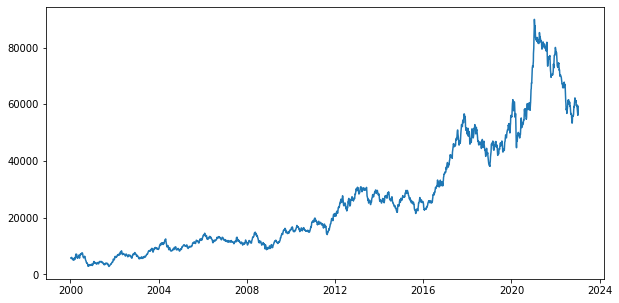

In [207]:
plt.figure(figsize = (10, 5))
plt.plot(df.index, df['MA5'])
plt.show()

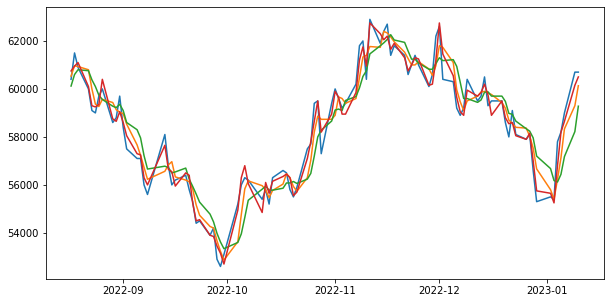

In [208]:
x = df.iloc[-100:,:]

plt.figure(figsize = (10, 5))
plt.plot(x.index, x['Close'])
plt.plot(x.index, x['MA3'])
plt.plot(x.index, x['MA5'])
plt.plot(x.index, x['Mid'])
plt.show()

In [209]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
MA3          2
MA5          4
Mid          0
dtype: int64

In [210]:
df.loc[df['Volume']==0]

,Open,High,Low,Close,Adj Close,Volume,MA3,MA5,Mid
Date,,,,,,,,,
2000-02-04,5130.0,5130.0,5130.0,5130.0,3855.405273,0,5170.0,5282.0,5130.0
2000-03-01,5120.0,5120.0,5120.0,5120.0,3847.890381,0,5013.0,5046.0,5120.0
2000-04-05,6800.0,6800.0,6800.0,6800.0,5110.478516,0,6900.0,6890.0,6800.0
2000-04-13,6910.0,6910.0,6910.0,6910.0,5193.149414,0,6973.0,7084.0,6910.0
2000-05-01,6000.0,6000.0,6000.0,6000.0,4509.245605,0,5800.0,5728.0,6000.0
...,...,...,...,...,...,...,...,...,...
2022-02-28,71900.0,71900.0,71900.0,71900.0,70610.367188,0,71767.0,72780.0,71900.0
2022-03-04,72900.0,72900.0,72900.0,72900.0,71592.437500,0,72500.0,72260.0,72900.0
2022-03-10,69500.0,69500.0,69500.0,69500.0,68253.414063,0,69700.0,70980.0,69500.0


In [211]:
df['Volume'] = df['Volume'].replace(0, np.nan)

In [212]:
df.isna().sum(axis = 0)

Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume       127
MA3            2
MA5            4
Mid            0
dtype: int64

In [213]:
df = df.dropna()

In [214]:
df.isna().sum(axis = 0)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
MA3          0
MA5          0
Mid          0
dtype: int64

In [215]:
# 정규화 / 음수가 없으면 MinMax를 사용하는게 일반적이다.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
    
df_scaled = scaler.fit_transform(df)
 
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled.head()

,Open,High,Low,Close,Adj Close,Volume,MA3,MA5,Mid
0,0.034868,0.032008,0.036288,0.034440,0.026655,0.285359,0.032553,0.033215,0.034066
1,0.037375,0.035517,0.038470,0.034440,0.026655,0.363715,0.033123,0.032434,0.036937
2,0.034982,0.031689,0.036518,0.033873,0.026217,0.177799,0.033808,0.032756,0.034011
3,0.034868,0.031689,0.036059,0.033760,0.026129,0.250704,0.033579,0.032962,0.033790
4,0.036235,0.033177,0.037437,0.035120,0.027181,0.300555,0.033808,0.033628,0.035225


In [216]:
def make_sequence_dataset(x, y, window_size):
    feature_list = []
    label_list = []

    for i in range(len(x)-window_size):
      feature_list.append(x[i:i+window_size])
      label_list.append(y[i+window_size])

    return np.array(feature_list), np.array(label_list)

In [217]:
x = df_scaled.drop(['Close', 'Adj Close'], axis = 1)
y = df_scaled['Close']

In [218]:
x.head()

,Open,High,Low,Volume,MA3,MA5,Mid
0,0.034868,0.032008,0.036288,0.285359,0.032553,0.033215,0.034066
1,0.037375,0.035517,0.038470,0.363715,0.033123,0.032434,0.036937
2,0.034982,0.031689,0.036518,0.177799,0.033808,0.032756,0.034011
3,0.034868,0.031689,0.036059,0.250704,0.033579,0.032962,0.033790
4,0.036235,0.033177,0.037437,0.300555,0.033808,0.033628,0.035225


In [219]:
y.head()

0    0.034440
1    0.034440
2    0.033873
3    0.033760
4    0.035120
Name: Close, dtype: float64

In [220]:
x_data, y_data = make_sequence_dataset(x,y, 20)
print(x_data.shape, y_data.shape)

(5628, 20, 7) (5628,)


In [221]:
train_size = int(len(x_data)*0.8)
train_size

4502

In [222]:
x_train = x_data[0:train_size]
x_test = x_data[train_size:]

y_train = y_data[:train_size]
y_test = y_data[train_size:]
x_train.shape, y_train.shape


((4502, 20, 7), (4502,))

### 모델

In [223]:
model = keras.Sequential()
model.add(layers.LSTM(32, activation = 'tanh', input_shape = (20, 7))) # 20 time step, 7 칼럼수
# input_shape은 3차원은 이미지데이터, 2차원은 rnn 1차원은 회귀, 분류
model.add(layers.Dense(1)) # 다중분류도 아니고, 예측값을 하나만 뽑으므로 activation은 없다.
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 32)                5120      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,153
Trainable params: 5,153
Non-trainable params: 0
_________________________________________________________________


In [224]:
model.compile(
    loss = 'mse',
    optimizer = 'rmsprop', # rnn에서는 rmsprop을 주로 쓴다.
    metrics=['mae'] # mae는 절댓값
)

In [225]:
EPOCHS = 100
BATCH_SIZE = 32
log = model.fit(x_train, y_train,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_split = 0.2,
                verbose = 1)

Epoch 1/100
113/113 [==============================] - 2s 8ms/step - loss: 0.0011 - mae: 0.0170 - val_loss: 3.2750e-04 - val_mae: 0.0134
Epoch 2/100
113/113 [==============================] - 1s 5ms/step - loss: 1.4010e-04 - mae: 0.0092 - val_loss: 0.0013 - val_mae: 0.0304
Epoch 3/100
113/113 [==============================] - 1s 5ms/step - loss: 9.2654e-05 - mae: 0.0073 - val_loss: 0.0013 - val_mae: 0.0340
Epoch 4/100
113/113 [==============================] - 1s 5ms/step - loss: 7.7574e-05 - mae: 0.0067 - val_loss: 1.3584e-04 - val_mae: 0.0090
Epoch 5/100
113/113 [==============================] - 1s 5ms/step - loss: 6.1594e-05 - mae: 0.0060 - val_loss: 2.0600e-04 - val_mae: 0.0105
Epoch 6/100
113/113 [==============================] - 1s 5ms/step - loss: 5.4622e-05 - mae: 0.0056 - val_loss: 0.0012 - val_mae: 0.0313
Epoch 7/100
113/113 [==============================] - 1s 5ms/step - loss: 5.2052e-05 - mae: 0.0054 - val_loss: 1.2711e-04 - val_mae: 0.0082
Epoch 8/100
113/113 [========

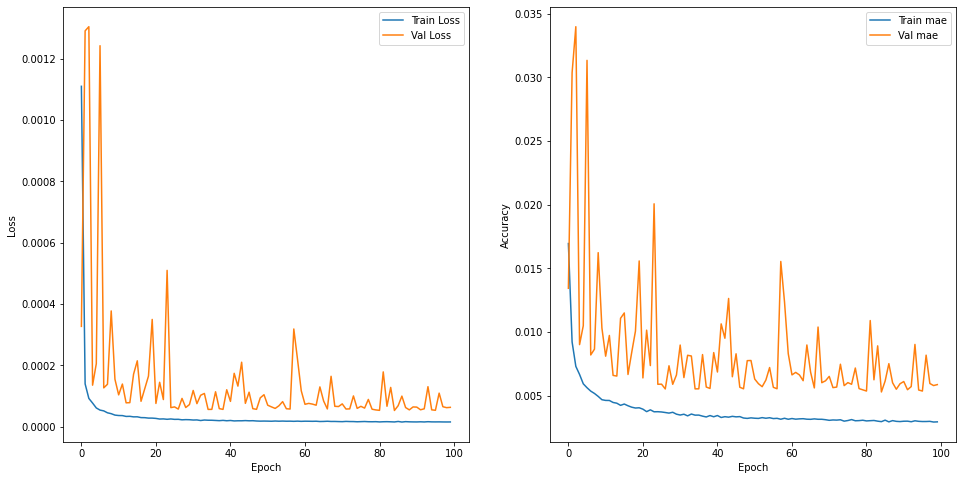

In [226]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['mae'],label='Train mae')
    plt.plot(hist['epoch'], hist['val_mae'],label = 'Val mae')

    plt.legend()
    plt.show()

plot_history(log) # 그래프가 벌어지면 과적합현상이 생기기 시작한것.

In [227]:
model.evaluate(x_train, y_train)

141/141 [==============================] - 0s 2ms/step - loss: 2.1922e-05 - mae: 0.0031


[2.1922296582488343e-05, 0.0031475552823394537]

In [228]:
y_pred = model.predict(x_test)

36/36 [==============================] - 0s 2ms/step


In [229]:
y_pred[:10]

array([[0.55601764],
       [0.5541926 ],
       [0.5459707 ],
       [0.5217806 ],
       [0.5387031 ],
       [0.5423951 ],
       [0.54090935],
       [0.5380261 ],
       [0.5406687 ],
       [0.52458924]], dtype=float32)

In [230]:
for i in range(10):
  print('True:', y_test[i], 'Pred:', y_pred[i].flatten())

True: 0.5615724481703863 Pred: [0.55601764]
True: 0.5502435708621276 Pred: [0.5541926]
True: 0.5298515917072618 Pred: [0.5459707]
True: 0.5434462444771724 Pred: [0.5217806]
True: 0.5502435708621276 Pred: [0.5387031]
True: 0.5479777954004759 Pred: [0.5423951]
True: 0.5502435708621276 Pred: [0.54090935]
True: 0.5423133567463465 Pred: [0.5380261]
True: 0.5315509233035006 Pred: [0.5406687]
True: 0.5343831426305653 Pred: [0.52458924]


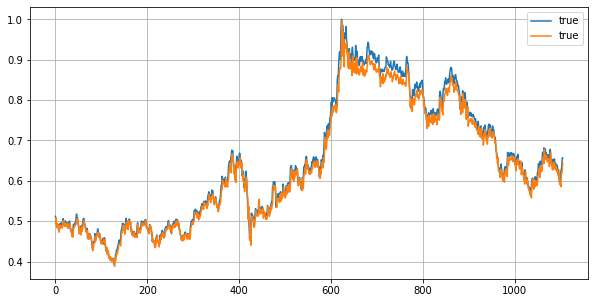

In [231]:
plt.figure(figsize = (10, 5))
plt.plot(y_test[20:], label='true')
plt.plot(y_pred[20:], label='true')
plt.grid()
plt.legend()
plt.show()

### Stack LSTM

In [241]:
model = keras.Sequential()
model.add(layers.LSTM(32, activation = 'tanh', return_sequences = True, input_shape = (20, 7)))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(32, activation = 'tanh')),
# LSTM을 여러개 쌓으면 과적합이 잘 걸릴수 있기때문에 넣늗다.
# 20 time step, 7 칼럼수
# input_shape은 3차원은 이미지데이터, 2차원은 rnn 1차원은 회귀, 분류
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1)) # 다중분류도 아니고, 예측값을 하나만 뽑으므로 activation은 없다.

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 20, 32)            5120      
                                                                 
 dropout_4 (Dropout)         (None, 20, 32)            0         
                                                                 
 lstm_8 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13,473
Trainable params: 13,473
Non-trainable params: 0
_________________________________________________________________


In [242]:
model.compile(
    loss = 'mse',
    optimizer = 'rmsprop', # rnn에서는 rmsprop을 주로 쓴다.
    metrics=['mae'] # mae는 절댓값
)

In [243]:
EPOCHS = 100
BATCH_SIZE = 32
log = model.fit(x_train, y_train,
                epochs = EPOCHS,
                batch_size = BATCH_SIZE,
                validation_split = 0.2,
                verbose = 1)

Epoch 1/100
113/113 [==============================] - 4s 13ms/step - loss: 0.0011 - mae: 0.0217 - val_loss: 4.6079e-04 - val_mae: 0.0186
Epoch 2/100
113/113 [==============================] - 1s 7ms/step - loss: 4.4126e-04 - mae: 0.0150 - val_loss: 0.0015 - val_mae: 0.0321
Epoch 3/100
113/113 [==============================] - 1s 7ms/step - loss: 3.4228e-04 - mae: 0.0132 - val_loss: 0.0047 - val_mae: 0.0622
Epoch 4/100
113/113 [==============================] - 1s 7ms/step - loss: 3.0018e-04 - mae: 0.0122 - val_loss: 4.3587e-04 - val_mae: 0.0151
Epoch 5/100
113/113 [==============================] - 1s 7ms/step - loss: 2.4581e-04 - mae: 0.0109 - val_loss: 0.0010 - val_mae: 0.0243
Epoch 6/100
113/113 [==============================] - 1s 7ms/step - loss: 2.3283e-04 - mae: 0.0105 - val_loss: 9.9088e-04 - val_mae: 0.0237
Epoch 7/100
113/113 [==============================] - 1s 7ms/step - loss: 2.1643e-04 - mae: 0.0102 - val_loss: 2.7385e-04 - val_mae: 0.0139
Epoch 8/100
113/113 [=======

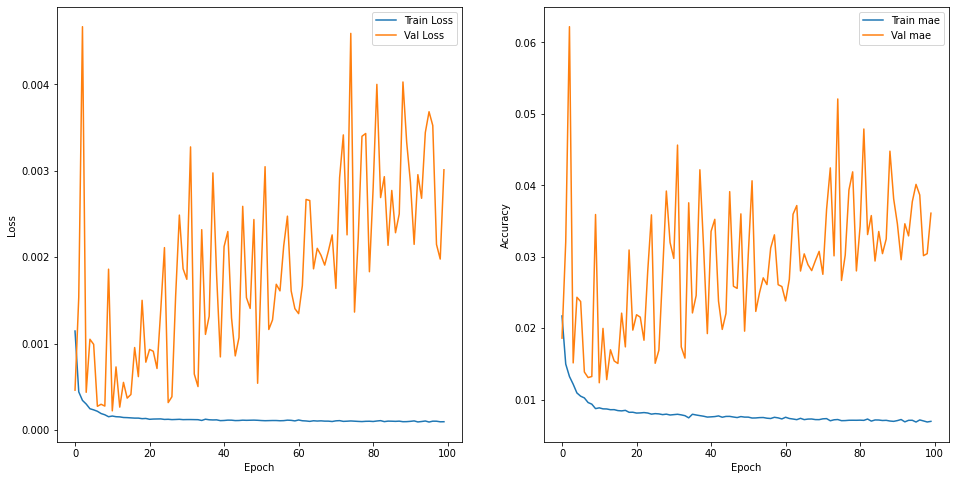

In [244]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['mae'],label='Train mae')
    plt.plot(hist['epoch'], hist['val_mae'],label = 'Val mae')

    plt.legend()
    plt.show()

plot_history(log) # 그래프가 벌어지면 과적합현상이 생기기 시작한것.

In [245]:
y_pred = model.predict(x_test)

36/36 [==============================] - 1s 2ms/step


In [246]:
for i in range(10):
  print('True:', y_test[i], 'Pred:', y_pred[i].reshape(-1))

True: 0.5615724481703863 Pred: [0.44315237]
True: 0.5502435708621276 Pred: [0.4466294]
True: 0.5298515917072618 Pred: [0.444776]
True: 0.5434462444771724 Pred: [0.43905383]
True: 0.5502435708621276 Pred: [0.43481112]
True: 0.5479777954004759 Pred: [0.4424612]
True: 0.5502435708621276 Pred: [0.44065493]
True: 0.5423133567463465 Pred: [0.44065857]
True: 0.5315509233035006 Pred: [0.44157147]
True: 0.5343831426305653 Pred: [0.43748504]


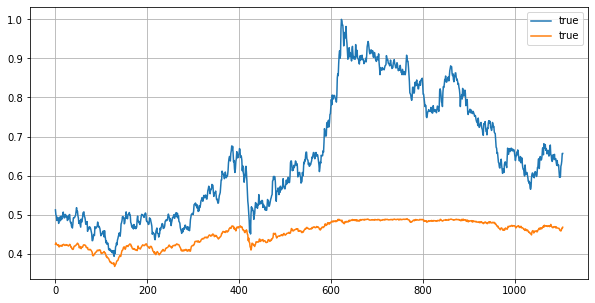

In [248]:
plt.figure(figsize = (10, 5))
plt.plot(y_test[20:], label='true')
plt.plot(y_pred[20:], label='true')
plt.grid()
plt.legend()
plt.show()